## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [ ]:
from __future__ import print_function
import random, numpy as np
import keras, tensorflow as tf
import time as time

from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def set_seed(seed_value=1234):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

tf.config.list_physical_devices('GPU')

[]

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape, x_train[444].dtype

((32, 32, 3), dtype('uint8'))

[9] truck


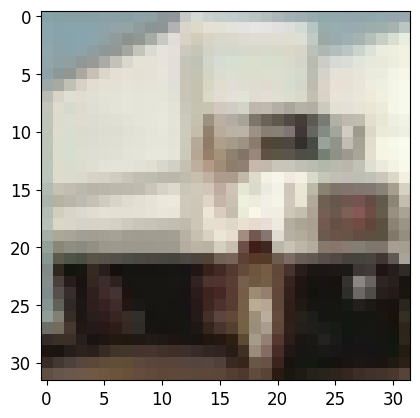

In [ ]:
## Let's look at one of the images

image_no = 444
print(y_train[image_no], class_names[y_train[image_no][0]])
plt.imshow(x_train[image_no]);

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [ ]:
set_seed(12345)

# Let's build a CNN using Keras' Sequential capabilities
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides=(2, 2), padding='same',
                 input_shape=x_train.shape[1:], activation='relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 6, 6, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

We still have 181K parameters, even though this is a "small" model.


In [ ]:
start_time = time.time()
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=10,
                        validation_data=(x_test, y_test),
                        shuffle=True)
end_time = time.time()
print('Execution time: ', end_time - start_time)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.3449 - loss: 1.8125 - val_accuracy: 0.4822 - val_loss: 1.4569
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5217 - loss: 1.3338 - val_accuracy: 0.5361 - val_loss: 1.2893
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5842 - loss: 1.1672 - val_accuracy: 0.5810 - val_loss: 1.1723
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6287 - loss: 1.0589 - val_accuracy: 0.5941 - val_loss: 1.1587
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6626 - loss: 0.9718 - val_accuracy: 0.6170 - val_loss: 1.1065
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6908 - loss: 0.8983 - val_accuracy: 0.6304 - val_loss: 1.0810
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7145 - loss: 0.8317 - val_accuracy: 0.6428 - val_loss: 1.0585
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7354 -

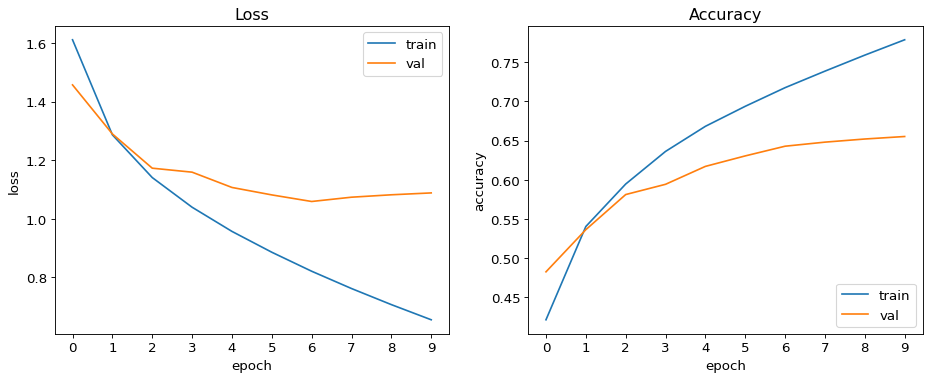

In [ ]:
fig = plt.figure(figsize=(14, 5), dpi=80)
ax = fig.add_subplot(1, 2, 1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history_1.history['loss'])
ax.plot(history_1.history['val_loss'])
ax.set_title('Loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper right')

ax = fig.add_subplot(1, 2, 2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history_1.history['accuracy'])
ax.plot(history_1.history['val_accuracy'])
ax.set_title('Accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='lower right')

### Model Evaluation

In [ ]:
print('Train Loss: {:.6f}, Accuracy: {:.6f}'.format(*model_1.evaluate(x_train, y_train, verbose=0)))
print(' Test Loss: {:.6f}, Accuracy: {:.6f}'.format(*model_1.evaluate(x_test, y_test, verbose=0)))
print()

y_pred = model_1.predict(x_test, verbose=0)

y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true=y_test_1d, y_pred=y_pred_1d).T
print(cm)

Train Loss: 0.654397, Accuracy: 0.771420
 Test Loss: 1.087803, Accuracy: 0.655200

[[601  12  38   7   9   9   4  11  31  25]
 [ 33 720  10   4   3   1   4   5  46  74]
 [ 48   7 491  47  58  36  23  17  14   9]
 [ 25  15  60 434  49 165  47  32  26  22]
 [ 23   2  93  74 614  59  44  80   5   5]
 [ 21   7  92 204  59 559  31  69  10  14]
 [ 33  15 119 119  88  69 812  19  15  15]
 [ 19   8  48  60  92  85  18 732  10  15]
 [106  36  25  17  14   8   7   6 800  32]
 [ 91 178  24  34  14   9  10  29  43 789]]


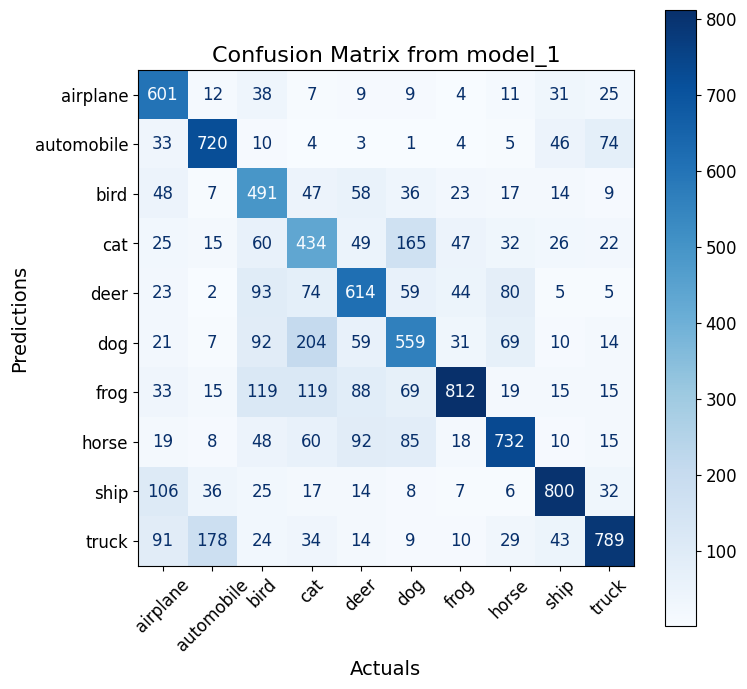

In [ ]:
plt.rcParams.update({'font.size': 12})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xlabel('Actuals', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.title('Confusion Matrix from model_1', fontsize=16)
plt.show()

In [ ]:
np.set_printoptions(precision=2)

print(classification_report(y_true=y_test_1d, y_pred=y_pred_1d, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.80      0.60      0.69      1000
  automobile       0.80      0.72      0.76      1000
        bird       0.65      0.49      0.56      1000
         cat       0.50      0.43      0.46      1000
        deer       0.61      0.61      0.61      1000
         dog       0.52      0.56      0.54      1000
        frog       0.62      0.81      0.70      1000
       horse       0.67      0.73      0.70      1000
        ship       0.76      0.80      0.78      1000
       truck       0.65      0.79      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



$
\begin{align}
Accuracy &= \frac{TP + TN}{TP + TN + FP + FN} \\
Precision &= \frac{TP}{TP + FP} \\
Recall &= \frac{TP}{TP + FN} \\
F1-Score &= \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
\end{align}
$

where
$TP$: True Positives, $TN$: True Negatives, $FP$: False Positives, and $FN$: False Negatives


### <span style="color:blue">แบบฝึกปฏิบัติ</span>
จากโครงสร้างของโมเดลเดิม:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. ให้สร้างโมเดลใหม่ที่มีความซับซ้อนมากขึ้นโดยสามารถใช้รูปแบบโครงสร้างดังนี้:
   - Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

   - ให้ใช้ stride เป็น 1 สำหรับทุกเลเยอร์ convolutional.

2. เทรนโมเดลใหม่โดยใช้เพียง 10 epochs (เท่ากับการเทรนโมเดลเดิม) และอธิบายสิ่งที่สังเกตได้ในเรื่องของเวลา และค่า loss และ accuracy ที่วัดได้จากทั้งชุดข้อมูลเทรนและเทส

3. จากผลการทดสอบโมเดลใหม่ด้วยชุดข้อมูลเทส ให้สร้างกราฟ Confusion Matrix และแสดงรายงาน classification report

4. หาภาพที่โมเดลใหม่ทำนายผิดมาอย่างน้อย 1 ภาพ โดยแสดงภาพให้ปรากฏ แสดงข้อความว่าภาพนั้นเป็นภาพของคลาสอะไร และโมเดลทำนายผิดเป็นคลาสอะไร

In [ ]:
set_seed(12345)

# Let's build a CNN using Keras' Sequential capabilities
model_2 = Sequential()
## Make convolution with kernel size 5x5 and stride = 1 for each convolutional
model_2.add(Conv2D(32, (5, 5), strides=(1, 1), padding= 'same', input_shape=x_train.shape[1:], activation='relu'))
model_2.add(Conv2D(32, (5, 5), strides=(1, 1), padding= 'same', input_shape=x_train.shape[1:], activation='relu'))
## 2x2 max pooling
model_2.add(MaxPooling2D(pool_size=(2, 2)))
## Convolution
model_2.add(Conv2D(32, (5, 5), strides=(1, 1), padding= 'same', input_shape=x_train.shape[1:], activation='relu'))
model_2.add(Conv2D(32, (5, 5), strides=(1, 1), padding= 'same', input_shape=x_train.shape[1:], activation='relu'))
## Max pooling
model_2.add(MaxPooling2D(pool_size=(2, 2)))
## Flatten
model_2.add(Flatten())
## Dense
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,133,546 (4.32 MB)

 Trainable params: 1,133,546 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=10,
                        validation_data=(x_test, y_test),
                        shuffle=True)
end_time = time.time()
print('Execution time: ', end_time - start_time)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 441s 281ms/step - accuracy: 0.3598 - loss: 1.7571 - val_accuracy: 0.5336 - val_loss: 1.3323
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 281ms/step - accuracy: 0.6025 - loss: 1.1191 - val_accuracy: 0.6306 - val_loss: 1.0574
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 432s 277ms/step - accuracy: 0.6969 - loss: 0.8687 - val_accuracy: 0.6981 - val_loss: 0.8742
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 444s 278ms/step - accuracy: 0.7621 - loss: 0.6964 - val_accuracy: 0.7251 - val_loss: 0.8573
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 278ms/step - accuracy: 0.8117 - loss: 0.5592 - val_accuracy: 0.7220 - val_loss: 1.0064
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 443s 279ms/step - accuracy: 0.8552 - loss: 0.4367 - val_accuracy: 0.7239 - val_loss: 1.1322
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 445s 281ms/step - accuracy: 0.8905 - loss: 0.3378 - val_accuracy: 0.7201 - val_loss: 1.2644
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 435s 278ms/step - ac

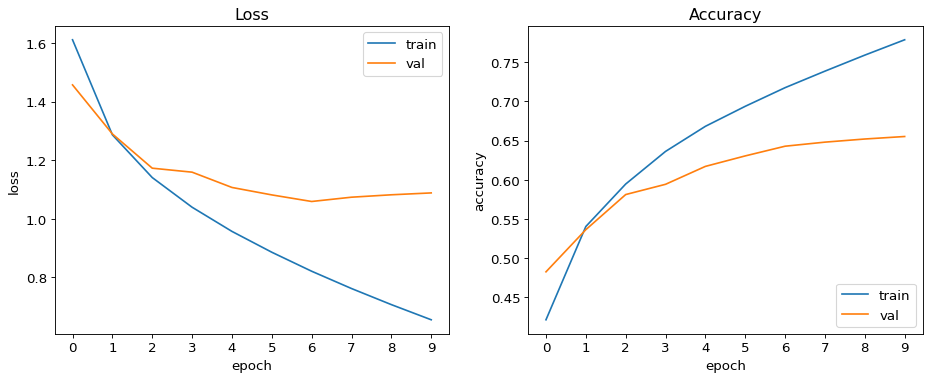

In [ ]:
fig = plt.figure(figsize=(14, 5), dpi=80)
ax = fig.add_subplot(1, 2, 1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history_1.history['loss'])
ax.plot(history_1.history['val_loss'])
ax.set_title('Loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper right')

ax = fig.add_subplot(1, 2, 2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history_1.history['accuracy'])
ax.plot(history_1.history['val_accuracy'])
ax.set_title('Accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='lower right')

In [ ]:
print('Train Loss: {:.6f}, Accuracy: {:.6f}'.format(*model_2.evaluate(x_train, y_train, verbose=0)))
print(' Test Loss: {:.6f}, Accuracy: {:.6f}'.format(*model_2.evaluate(x_test, y_test, verbose=0)))
print()

Train Loss: 0.385061, Accuracy: 0.899960
 Test Loss: 2.030018, Accuracy: 0.711000



In [ ]:
y_pred = model_2.predict(x_test, verbose=0)

y_test_2d = np.argmax(y_test, axis=1)
y_pred_2d = np.argmax(y_pred, axis=1)

cm_2 = confusion_matrix(y_true=y_test_2d, y_pred=y_pred_2d).T
print(cm_2)

[[599   7  30   2   9   2   1   2  25  15]
 [ 12 806   2   1   2   1   0   1  17  53]
 [ 80   6 650  84  78  68  38  26  20   6]
 [ 66  15  80 588  74 224  50  61  31  40]
 [ 34   4  60  43 634  35  13  45   7   5]
 [  9   4  38  96  13 518   9  35   6   7]
 [ 41  33  85 127 107  75 878  23  22  34]
 [ 28   3  43  44  77  71   6 803   5  31]
 [ 92  37   9   8   6   4   5   1 845  20]
 [ 39  85   3   7   0   2   0   3  22 789]]


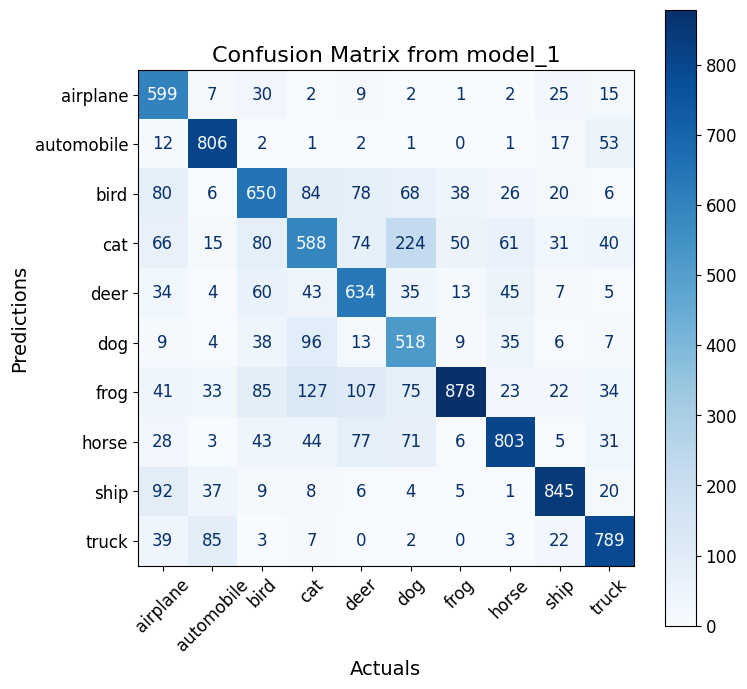

In [ ]:
plt.rcParams.update({'font.size': 12})
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xlabel('Actuals', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.title('Confusion Matrix from model_1', fontsize=16)
plt.show()

In [ ]:
np.set_printoptions(precision=2)

print(classification_report(y_true=y_test_2d, y_pred=y_pred_2d, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.87      0.60      0.71      1000
  automobile       0.90      0.81      0.85      1000
        bird       0.62      0.65      0.63      1000
         cat       0.48      0.59      0.53      1000
        deer       0.72      0.63      0.67      1000
         dog       0.70      0.52      0.60      1000
        frog       0.62      0.88      0.72      1000
       horse       0.72      0.80      0.76      1000
        ship       0.82      0.84      0.83      1000
       truck       0.83      0.79      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.71      0.71     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step


Text(0.5, 1.0, 'True Class: horse\nPredicted Class: bird')

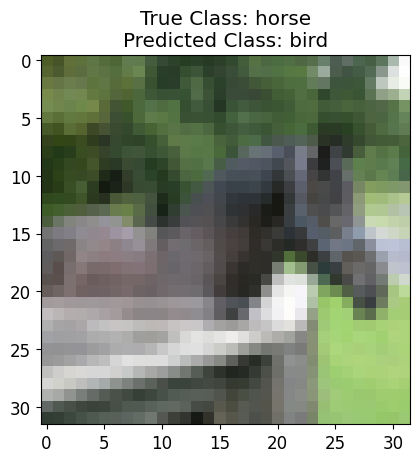

In [ ]:
# import random
import random
# Get all prediction for all image test
y_pred_probs = model_2.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
# Make condition to get misclassified image
misclassified_idx = np.where(y_pred_classes != y_test_classes)[0]
random_index = misclassified_idx[random.randint(0, (len(misclassified_idx) - 1))]
# Display image
image = x_test[random_index]
true_class = class_names[y_test_classes[random_index]]
predicted_class = class_names[y_pred_classes[random_index]]
plt.imshow(image)
plt.title(f"True Class: {true_class}\nPredicted Class: {predicted_class}")

In [ ]:
num_misclassified = len(misclassified_idx)
print(num_misclassified)

2890
